# Modeling the World

### Objectives

- To explore how Python classes & objects can make code more expressive
- To model the bookstore dataset using Python classes
- To use methods to add behaviors to Python classes
- To practice writing tests for complex Python objects

### Introduction

- With Python and the **JSON format**, we've used code to reveal structures and express relationships within a dataset.


- We've also created **user stories** to guide our design of programming functionality.


- Both of these approaches -- code as data, code as story -- show how a programming language like Python can help us solve problems in the "real" world.


- Our last lesson will build on both of these previous approaches, introducing a new and powerful feature of Python (which it shares with many, but not all, other programming languages): a feature that lets us more explicitly **model** problems that we want to solve. 


- This feature of Python supports what is sometimes referred to as **object-oriented programming**. But it might be simpler just to keep in mind that today we'll be using a special Python data type called a **class**.

### I. Creating a Model

On the first day of Python Camp, each team created a schema to describe the structure of our bookstore dataset. 

Today we're going to revisit that work, but instead of starting from a dataset, we're going to start from what we know about that aspect of the world that the dataset itself describes: GW courses and textbooks.

##### Try it out!

In your teams, create a model of GW courses and textbooks. 

- Modeling describes kinds of **objects** -- kinds of things -- and their relationships. What kinds of objects are involved in talking about textbooks? How are these objects related?
- We can also include details about objects as **attributes**. These are like tags that help distinguish one particular object from others of its kind.   
- In modeling, we have to make choices about the level of detail we want to represent. In this case, we're limited by the GW bookstore dataset, so we can restrict our model to those pieces of information already captured in the dataset.
- But try not to think about Python syntax or data structures at this point. Think in terms of the "real" world of courses and textbooks. 

The image in the cell below shows an example of a model of Python Camp. This model is very simple: it includes only three kinds of object (Python Camp itself, instructors, and learners) and two relationships. We've left out other important aspects of Python Camp, like lessons, homework exercises, etc. 

Since there can be multiple instances of Python Camp, each of which can have multiple instructors and learners, we list some attributes that could help us identify one particular **instance** of Python Camp, or one particular instructor or learner, from the others.

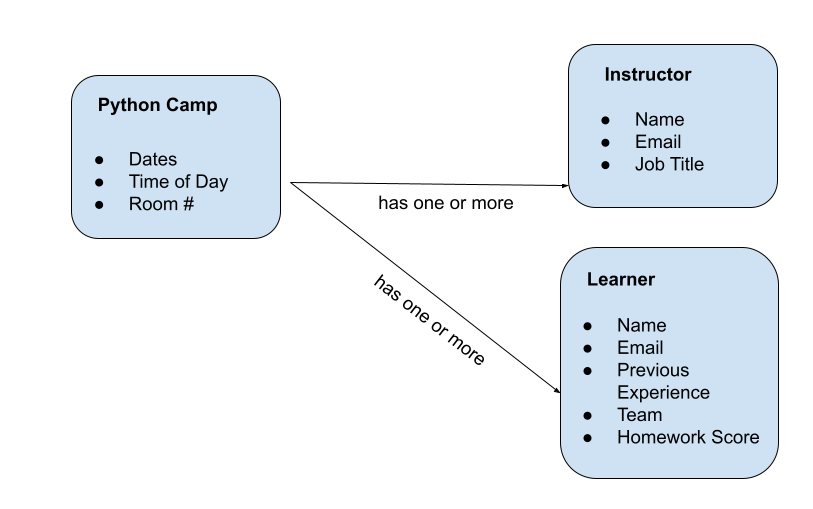

(for instructors)

Have each team share their model. (Or have one team share, and ask who came up with something different, etc.)


The following points might be useful to emphasize. 

- In defining kinds of objects, we usually start with singular terms: _a course_, _a textbook_. 
- Between objects, we define relationships of one-to-one, one-to-many, or many-to-many.
- It's up to us to decide whether something is an attribute or a separate kind of object. 
  - In the Python-Camp model, for instance, we could have modeled each team as a separate object. 
- But if something doesn't itself have many (or any) relevant attributes, we often won't bother doing so.
  - For instance, we could model the textbook publisher as its own kind (of object), if we wanted to represent details specific to each publisher.
  - But in this case, given our dataset, we don't really have such details, so it probably makes more sense to treat a publisher simply as an attribute of a textbook.
  
-----------------

A useful model of our course/textbook domain might look like the following:

- A course (kind of object)
  - Attributes:
    - Department 
    - Course Number
    - Section
    - Term
  - Relationships:
    - Has zero or more textbooks
- A textbook (kind of object)
  - Attributes:
    - Title
    - Author
    - Publisher
    - ISBN
    - Copyright Date
    - Requirement Type
    - Material Type
    - Edition
    - Price
    - Format (print/digital)
    - Condition (new/used)
    - Mode of Purchase
      - Buy
      - Rent
    
             

### II. Modeling with Classes

To represent our objects and relationships explicitly in Python, we use Python **classes**.

Working with classes can seem intimidating at first. But keep in mind: the primary reason for using classes is _to make our code more readable for ourselves_ (and for other people who might reuse our code). 

We've already modeled the relationship between GW courses and textbooks using Python **lists** and **dictionaries**, and our code won't work better if we add classes to the mix. 

But once you get the hang of them, you may find that using classes makes your code easier to read and reason about. 

#### II.1 Defining a Class

A class is sort of like a Python **function** in that it must be defined before it can be used. The class definition is where we specify the attributes each object in the class will have, as well as its relationships to other classes/kinds of objects.

A class defines a _kind_ of object: like a species in biology, or a type of particle in physics. Hence we don't put details about _particular objects_ in the class definition. (In defining the species "dog," we wouldn't include the names of any particular dogs, for instance.)

There's one more important thing about Python classes: in addition to attributes and relationships, they also define **behaviors**. These behaviors are defined as functions, which we call **methods**, to distinguish them from functions that are not associated with particular classes. 

We'll cover creating methods later, but in the code below, note that `__init__` is a special method that is used to add attributes to the objects in a class.


In [1]:
class Course:
    
    def __init__(self, dept, course_number, section, instructor, term):
        '''
        Creates an instance of a course.
        dept, course_number, section, instructor, term: should be of type str
        '''
        self.dept = dept
        self.course_number = course_number
        self.section = section
        self.instructor = instructor
        self.term = term

Let's unpack the code above. 

- The `class` keyword (like the `def` keyword for functions) indicates the definition of a class.
- Like a function, a class needs a name. It's Python convention to name classes with capitalized names, to differentiate them from other variables.
- The `class` statement ends with a colon (`:`), and the body of the class is indented underneath it.
- Typically, a class definition will include one or more **method** definitions. 
- Methods are defined like functions, with these two differences:
  - Methods are defined as part of the body of a class.
  - Methods take a special first argument named `self`. 
- The `__init__` method here accepts five arguments in addition to `self`: `dept`, `course_number`, `section`, `instructor` and `term`. 
- The triple quotation marks underneath the `def` line are called a **docstring**. Like a comment (beginning with `#`), a docstring at the beginning of a function or method definition allows us to document the behavior of the function or method.
- The body of the `__init__` method here reassigns each of those arguments to new variables beginning with `self`, followed by a dot `.` and a name. The latter are the class **attributes**. 
- We could use different names for the attributes and the method arguments, but it usually makes more sense to keep them the same. 

The purpose of all of this will become clearer below.

In [2]:
my_course = Course('AMST', '6190', '10', 'Elisabeth Anker', 'Summer 2023')

In the line above, we create a single **instance** of our `Course` class. 

Note that when creating the instance, we use syntax that looks very much like calling a Python function, passing the arguments that will become the attributes of this course in parentheses.

In [4]:
print('Department:', my_course.dept)
print('Course Number:', my_course.course_number)
print('Section:', my_course.section)

Department: AMST
Course Number: 6190
Section: 10


We can retrieve the attributes from the instance by using the dot notation: `my_course.dept`, etc.

This works because our `__init__` method assigns these arguments to instances of the `Course` class via the `self` argument. 

We've used classes and methods before. Recall the `split` method available on strings. We can write `'AMST 6190 10'.split()` because in Python, the quotation marks _automatically_ create a new instance of the special `str` class, and every instance of the `str` class gets access to the string methods.

##### Try it out!

Create another instance of the `Course` class below, using a different variable name from `my_course` and different arguments. See if you can print the department, course number, and section from your new instance.

(for instructors)

Now would be a good moment to take questions and work to clarify the purpose and mechanics of classes.

Some helpful pointers:

##### Classes as templates
- A class definition provides a _template_ for data. We've seen how to describe courses using Python dictionaries. The dictionary **keys** are functionally similar to the class **attributes**. 
- But when creating a list of dictionaries, there's no good way to _require_ that all dictionaries in the list have the same keys. 
  - We could, for instance, have added any random key to any one of the dictionaries in our `bkst_data` list, thereby creating an inconsistent data structure. 
  - And as we saw in the "Error Stories" homework, inconsistencies in data are liable to break your code!
- By using a class, on the other hand, we make it clearer to the user (including ourselves) that a course should have only certain attributes and no others.

##### Classes vs. instances
- A class defines a _kind_ of thing. In English, this is analogous to talking about _a thing_ (with the indefinite article): e.g., "I plan to take a course in engineering this semester." (I haven't said which one. There could be any number of engineering courses that might satisfy my description.) 
- An instance of a class refers to one specific thing. In English, this is analogous to talking about _this thing_ (or _the thing_): "This book on Python is really interesting." (It's clear that I'm talking about one book, in distinction from all the other books on Python out there.)
- Each class can have multiple instances (just as in English, "a Python book" can refer to any number of books about Python). 
  - If you run the code `type(my_course)`, you can see that the variable `my_course` has for its data type `__main__.Course`. Ignoring the `__main__` part, we can see the name of our class. In other words, we've now created our very own Python data type!

##### Dot notation
- Once we have created an instance of the class, we can refer to the attributes like so: `my_course.dept`, etc. Note that we do NOT write `Course.dept`. That will produce an error.
- Inside the `__init__` method -- or any other method defined in our class -- we can use the required `self` argument to refer to _instances_ of the class. 
- Python effectively translates `self.dept` into `my_course.dept` when we run this code:

```
my_course = Course('AMST', '6190', '10', 'Elisabeth Anker', 'Summer 2023')
```


#### II.2 Defining relationships

So far, instances of our `Course` class have no way of capturing information about textbooks. Let's fix that by rewriting our class definition as follows:

In [6]:
class Course:
    
    def __init__(self, dept, course_number, section, instructor, term):
        '''
        Creates an instance of a course.
        dept, course_number, section, instructor, term: should be of type str
        '''
        self.dept = dept
        self.course_number = course_number
        self.section = section
        self.instructor = instructor
        self.term = term
        self.texts = []  # Store a list of texts here

We've simply added a new attribute to our class called `texts`, which we have initialized as an empty list. This list will hold instances of the `Text` class, which we'll create next.

##### Try it out!

Following the example of our `Course` class, define a class called `Text` to hold the attributes we identified when modeling textbooks above. The `__init__` method should take arguments corresponding to those attributes and assign them to the class instance via the `self` argument.

To keep things simple, use only the attributes of the textbook we've used thus far:

- isbn
- price
- item_type (whether print or digital)
- type_condition (BUY_NEW, BUY_USED, RENTAL_NEW, RENTAL_USED)

In [ ]:
# Your code here

(for instructors)

A possible solution looks like the following:

```
class Text:

    def __init__(self, isbn, item_type, price, type_condition):
        self.isbn = isbn
        self.item_type = item_type
        self.price = price
        self.type_condition = type_condition

```

#### II.3 Adding methods

Our `Course` class has no methods other than `__init__`, because we just using it store some data about each course. 

But the real power and convenience of classes enters when we add custom methods that define behavior specific to instances of that class. Methods make classes and their instances more than just places to park data. 

For example, consider a spreadsheet application like Google Sheets or Excel. The application allows you to create multiple spreadsheets. The data on different spreadsheets can be very different, but all spreadsheets (within the same application) share certain features: like the ability to save the document, to format cells, to sort and filter, etc. 

If we wanted to model the spreadsheet application using classes and methods, we might imagine a `SpreadSheet` class. This class might have a `data` attribute to store the data associated with a particular spreadsheet (available as `spreadsheet.data`, if `spreadsheet` is an instance of our `SpreadSheet` class). To save the spreadsheet, we could call `spreadsheet.save()`, which would (internally) use the `data` attribute to access the data and write it to disk.

In the code below, we'll add a method to our `Text` class. The functionality is familiar: converting a string representation of a price to a float. 

Expand the collapsed cell to see and run the code.

In [33]:
class Text:

    def __init__(self, isbn, item_type, price, type_condition):
        '''
        All arguments should be of type str.
        '''
        self.isbn = isbn
        self.item_type = item_type
        self.price = price
        self.type_condition = type_condition
    
    def convert_price(self):
        '''
        Convert the str representation of a price (with dollar sign) to a float
        '''
        return float(self.price[1:])

Note that our `covert_price` method takes a single argument: `self`. When we _call_ this method, we won't actually provide any arguments to this method. We'll simply write `my_text.convert_price()` (assuming `my_text` is an instance of the `Text` class). 

The `self` argument is a reference to the instance (`my_text`) _itself_ -- hence the name `self`. The Python interpreter automatically handles the `self` argument when calling the method (if we call it using dot notation). 

Inside the method, the `self` argument allows us access to the attributes of `my_text` (as initialized when we create our `my_text` instance). 

##### Try it out!

Create an instance of the `Text` class called `my_text`, assigning it attributes the way we did in creating `my_course` from the `Course` class.

Then call `my_text.convert_price()` to confirm that the method works. 

Remember that `convert_price()` assumes that `self.price` is a string beginning with the dollar sign (`$`).

In [10]:
# Your code here

##### Try it out!

Now can you use the `assert` keyword to write a test for the `convert_price()` method? 

Tests are especially useful when working with functions and classes. Since both functions and classes allow us to encapsulate (hide the details of) our logic, tests help us ensure the behavor continues to work as expected as we make changes (to add new features, etc.)

In [11]:
# Your code here

In [20]:
# Assumes that my_text.price == '$44.50'
assert my_text.convert_price() == 44.5

#### II.4 Completing the model

We now have a `Course` class for representing intances of courses, and a `Text` class for representing textbooks assigned to courses. 

The next step is to use these classes to represent our actual dataset. 

In the code below, we're using a familiar pattern: 
- creating an empty list to hold our `Course` instances;
- looping through the list of courses (`bkst_data`);
- looping through the list of texts associated with each course;
- transforming the data within the loops and adding the transformed elements to our new list.

The main difference here is that instead of using dictionaries and list, we're using our new classes to hold the data. 

As usual, we first need to load our data from the JSON file.

In [21]:
import json
with open('../../data/bookstore-data-simplified.json') as f:
    bkst_data = json.load(f)

##### Try it out!

Working with your team, can you complete the code below to create a list of `Course` instances, each of which holds a list of `Text` instances?

Fix the partial code in the function below and add code as needed so that the tests complete without errors.

In [ ]:
def transform_course_data(course_data):
    '''
    Transforms a list of nested dictionaries representing courses and textbooks into instances
    of the Course and Text classes, defined above. Returns a list of Course instances.
    '''
    courses = []
    # Note that the loop variable here is called course_dict
    # To remind us that it's a dictionary, not an instance of our Course class
    for course_dict in course_data:
        course = Course()  # How do we initialize a Course instance with the data in course_dict?
        for text_dict in course_dict['texts']:
            text = Text() # How do we initialize a Text instance from text_dict?
            # Now what do we do with text once we've created it?
        # Did you forget to do something with the course variable created above?
    return courses
# Call the function to create the list of Courses
courses = transform_course_data(bkst_data)
# Tests
assert len(courses) == len(bkst_data)
assert len(courses[99].texts) == len(bkst_data[99]['texts'])
assert courses[99].texts[0].convert_price() == 113.5

(for instructors)

The completed code should look like the following. Note that the order of arguments to `Course()` and `Text()` matter.

```
def transform_course_data(course_data):
    '''
    Transforms a list of nested dictionaries representing courses and textbooks into instances
    of the Course and Text classes, defined above. Returns a list of Course instances.
    '''
    courses = []
    # Note that the loop variable here is called course_dict
    # To remind us that it's a dictionary, not an instance of our Course class
    for course_dict in bkst_data:
        course = Course(course_dict['department'], course_dict['course'], 
                        course_dict['section'], course_dict['instructor'], 
                        course_dict['term_name']) 
        for text_dict in course_dict['texts']:
            text = Text(text_dict['isbn'], text_dict['item_type'], 
                        text_dict['price_display'], text_dict['type_condition']) 
            course.texts.append(text)
        courses.append(course)
    return courses
courses = transform_course_data(bkst_data)
assert len(courses) == len(bkst_data)
assert len(courses[99].texts) == len(bkst_data[99]['texts'])
assert courses[99].texts[0].convert_price() == 113.5
```

In [53]:
def transform_course_data(course_data):
    '''
    Transforms a list of nested dictionaries representing courses and textbooks into instances
    of the Course and Text classes, defined above. Returns a list of Course instances.
    '''
    courses = []
    # Note that the loop variable here is called course_dict
    # To remind us that it's a dictionary, not an instance of our Course class
    for course_dict in bkst_data:
        course = Course(course_dict['department'], course_dict['course'], 
                        course_dict['section'], course_dict['instructor'], 
                        course_dict['term_name']) 
        for text_dict in course_dict['texts']:
            text = Text(text_dict['isbn'], text_dict['item_type'], 
                        text_dict['price_display'], text_dict['type_condition']) 
            course.texts.append(text)
        courses.append(course)
    return courses
courses = transform_course_data(bkst_data)
assert len(courses) == len(bkst_data)
assert len(courses[99].texts) == len(bkst_data[99]['texts'])
assert courses[99].texts[0].convert_price() == 113.5

#### II.5 Classes: Why bother?

It may strike you that we've haven't gained much practical advantage from converting our list of nested dictionaries to a list of class instances. It may seem to you that it makes just as much sense to express the relationships between courses and texts through the keys of a dictionary as through the attributes of a class.

If so, you're not wrong -- and you may be learning something about your own emerging preferences as a programmer.

_You absolutely do not have to use classes in order to write effective Python code._ Even some very skilled programmers hardly ever use them. The choice to use classes depends both on your own preferences and on the context in which you are writing code.

That said, classes can be useful because they can make relationships more explicit. Compare the results of the following two lines of code.

In [45]:
print('The first element of bkst_data is of type', type(bkst_data[0]))

dict

In [50]:
print('The first element of courses is of type', type(courses[0]))

The first element of courses is of type <class '__main__.Course'>


What do you notice? Can you think of reasons why programmers might want to use classes instead of (or in addition to) dictionaries when modeling their data?

(for instructors)

- Elicit responses to the above questions from each team or from individuals.

- Here is one way of explaining the difference.

> The first line tells us that something is a `dict`, which we could also determine by inspecting the JSON file in a text editor. A Python dictionary is a data structure with certain functionality and structure, but it doesn't have any particular _meaning_ in relation to any sort of user story. We can use dictionaries for any number of things.

> By contrast, the second line tells us that something is an instance of a class called `Course`. Whatever else `Course` does, the name alone indicates some sort of relationship to things out in the world; it suggests the existence of a user story. (Without good documentation, of course, the name of a class won't provide that much help to the users of your code. But it does provide a foundation for writing code that makes its purpose and functionality as explicit as possible.

> In addition, as code becomes more complex, using classes can help us both read the code itself and understand any errors that the code generates. The class names serve as guideposts, signalling what portion of the code we're dealing with at a given moment. (This becomes particularly useful when code is large enough that it makes sense to break it into multiple files.)


#### II.6 A final example

In the code that follows, we redo the exercise of finding the course with the most expensive textbook. In this version of the exercise, we leverage methods and attributes to record, for each instance of Course, its most expensive text.

First, we need to re-write the `Course` class to include a new method.

In [56]:
class Course:
    
    def __init__(self, dept, course_number, section, instructor, term):
        '''
        Creates an instance of a course.
        dept, course_number, section, instructor, term: should be of type str
        '''
        self.dept = dept
        self.course_number = course_number
        self.section = section
        self.instructor = instructor
        self.term = term
        self.texts = []  
        self.most_expensive = 0
    
    def add_text(self, text):
        '''
        Adds a given text to the list of texts for this course. 
        text should be an instance of the Text class.
        '''
        self.texts.append(text)
        price = text.convert_price()
        if price > self.most_expensive:
            self.most_expensive = price

We've added a method `add_text` to the `Course` class. 

This method does two things:
 - Append its argument to the list of texts for the course on which the method is called.
 - Update that course's `most_expensive` attribute if this text is more expensive that any text we've already added to this course.

Note that this method does _not_ return anything. That's because as a method, it has access to the underlying instance of `Course` that it's been called on (the `self` argument), and here, we're storing both the texts and the most expensive text on the instance itself!

In other words, we're stipulating that it's a behavior of a course to know its most expensive textbook. 

We've already seen one example of a method that doesn't return anything: the `list.append()` method. Like our method above, when we call `append` on a list, we add a value to the underlying list, so we don't get any value back from the method call. 

We've said that functions and methods are used to transform data. In many cases, the data to be transformed are the arguments themselves. But in cases like `list.append()` or `Course.add_text()`, the data to be transformed actually the underlying class instances.  

--------------

In the following code, we rewrite our `transform_course_data` function to use our new method when adding texts. Note that we've included our tests, so as to confirm that our class re-write didn't change any other behaviors.

Make sure you can identify the line we've changed in the definition of `transform_course_data`.

In [57]:
def transform_course_data(course_data):
    '''
    Transforms a list of nested dictionaries representing courses and textbooks into instances
    of the Course and Text classes, defined above. Returns a list of Course instances.
    '''
    courses = []
    # Note that the loop variable here is called course_dict
    # To remind us that it's a dictionary, not an instance of our Course class
    for course_dict in bkst_data:
        course = Course(course_dict['department'], course_dict['course'], 
                        course_dict['section'], course_dict['instructor'], 
                        course_dict['term_name']) 
        for text_dict in course_dict['texts']:
            text = Text(text_dict['isbn'], text_dict['item_type'], 
                        text_dict['price_display'], text_dict['type_condition']) 
            course.add_text(text)
        courses.append(course)
    return courses
courses = transform_course_data(bkst_data)
assert len(courses) == len(bkst_data)
assert len(courses[99].texts) == len(bkst_data[99]['texts'])
assert courses[99].texts[0].convert_price() == 113.5

Now if we want to find the course with the most expensive textbook, we can use the following code.

Note that instead of keeping track of the most expensive with two variables -- one for the price, one for the course info -- we can use just one (`most_expensive_course`). However, we have to initialize this variable with an instance of `Course`, so for expedience's sake, we just use the first `Course` instance in our `courses` list. 

Then we loop over the rest of the list (`courses[1:]`) -- there's no need to compare the first course to itself.

In [59]:
most_expensive_course = courses[0]
for course in courses[1:]:
    if course.most_expensive > most_expensive_course.most_expensive:
        most_expensive_course = course
print('Most expensive course is:', most_expensive_course.dept, 
        most_expensive_course.course_number, most_expensive_course.section)

Most expensive course is: PHYS 1011 10


#### II.7 Saving our work

One disadvantage to defining your own classes is that they don't work well with common formats like JSON. The reason is that JSON is meant to work with any number of different programming languages, and the Python `json` library maps the most common Python types onto the JSON format. But the `json` library doesn't know anything about our `Course` and `Text` classes.

It's not too difficult to write a function that would take the attributes of our classes and convert them back to lists and dictionaries -- sort of the inverse of our `transform_course_data` function.

But there _is_ an easier way. The Python `pickle` library allows us to save _any_ valid Python type -- including those that we create -- as a binary file on disk. 

The file won't be readable in a text editor, unfortunately. But you can open it in Python using `pickle` and work with its class instances just as if you had defined those classes yourself.

Below we pickle our `courses` list so that we can work with it at a later date.

In [62]:
import pickle
with open('../../data/bookstore-data-simplified.pkl', 'wb') as f:
    pickle.dump(courses, f)

### Wrapping Up